In [1]:
import pandas as pd


df = pd.read_csv(r"C:\Users\Lakshay\netflix_titles.csv")


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Dataset shape (rows, columns)
df.shape

(8807, 12)

In [3]:
# Column names
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# Missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df = df.drop(columns=['director'])

In [8]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [9]:
df['release_year'] = df['release_year'].fillna(df['release_year'].mode()[0])

In [10]:
# Duplicate rows
df.duplicated().sum()

np.int64(0)

In [11]:
# Drop Duplicate rows
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            825
country           0
date_added       10
release_year      0
rating            0
duration          3
listed_in         0
description       0
dtype: int64

In [13]:
df['cast'] = df['cast'].fillna('Unknown')

In [14]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [15]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

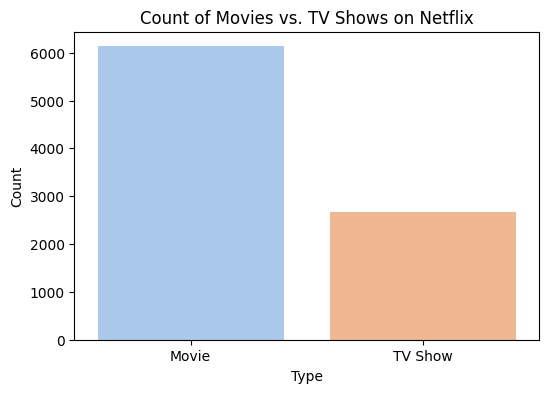

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, hue="type", palette="pastel", legend=False)
plt.title("Count of Movies vs. TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

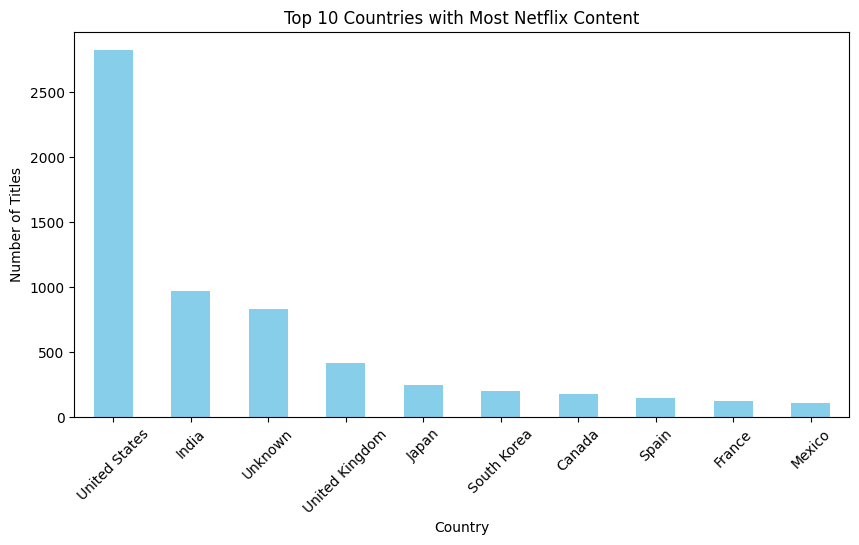

In [18]:
# Top 10 countries with most content
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

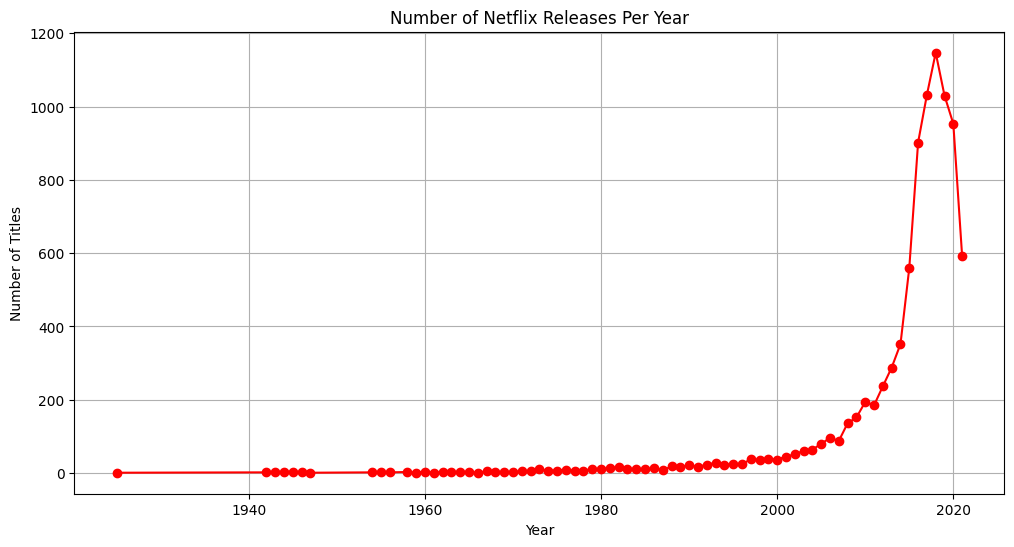

In [19]:
# Number of releases per year
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='red')
plt.title("Number of Netflix Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()